In [1]:
pip install scikit-learn umap-learn sentence-transformers


                                              0.0/90.9 kB ? eta -:--:--
     ---------------------------------------- 90.9/90.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
     ------                                   0.4/2.6 MB 13.9 MB/s eta 0:00:01
     ---------------                          1.0/2.6 MB 13.3 MB/s eta 0:00:01
     ---------------------------              1.8/2.6 MB 14.2 MB/s eta 0:00:01
     --------------------------------------   2.5/2.6 MB 14.6 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 12.9 MB/s eta 0:00:00
                                              0.0/55.8 kB ? eta -:--:--
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
                                              0.0/28.1 MB ? eta -:--:--
                                              0.6/28.1 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Import des bibliothèques nécessaires

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.datasets import fetch_20newsgroups
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import torch

# Fonction pour effectuer la réduction de dimension avec ACP

In [6]:
def perform_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    return pca_result

# Fonction pour effectuer le clustering avec k-means

In [7]:
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(data)
    return pred

# Fonction pour évaluer les résultats du clustering

In [8]:
def evaluate_clustering(true_labels, pred_labels):
    nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
    ari_score = adjusted_rand_score(true_labels, pred_labels)
    return nmi_score, ari_score

# Import des données NG20

In [3]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# Embedding

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# Réduction de dimension avec ACP

In [9]:
pca_result = perform_pca(embeddings, 20)

# Clustering avec k-means

In [10]:
pred_labels = perform_kmeans(pca_result, k)

# Évaluation des résultats du clustering

In [11]:
nmi_score, ari_score = evaluate_clustering(labels, pred_labels)

# Affichage des résultats
print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.42 
ARI: 0.24


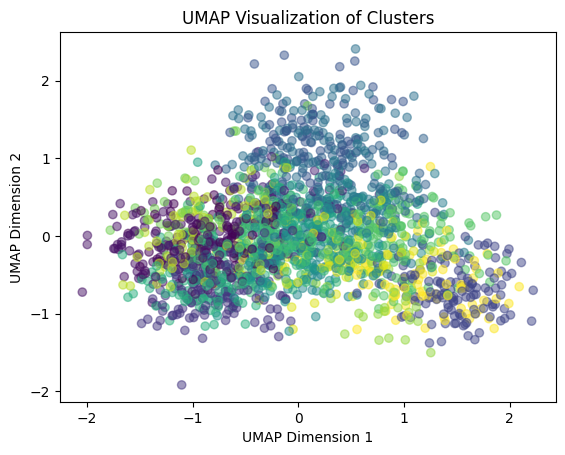

In [17]:
# Visualisation des clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pred_labels, cmap='viridis', alpha=0.5)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()